# Flow Distribution for the Two Treatment Trains
## Problem Definition
The two 60 L/s trains need proper flow control. They need a flow control system to split the plant flow evenly between the two trains that would enable fine grain flow control. This distribution system should keep flow control for each train independent - such that decreasing one train's flow doesn't increase the other's. 

## Existing Conduction Line
The existing conduction line is composed of two independent pipes of 4" and 6" size. Presumably, one was added after the other in an attempt to augment the flow rate. Two pressure breaks, one for each line, are located 30 meters higher in elevation and 455 meters away from the proposed plant site. By definition, these two pressure breaks have a free surface, and therefore the difference in elevation between the pressure break and the plant's entrance tank represents the maximum available head for delivering, splitting and controlling the flow. The diagram below summarizes the existing system components:

<img src="https://docs.google.com/drawings/d/e/2PACX-1vTYoz334ZI_fy6hpKUyfmm7Ap24bQDkuBVZXC4JJvACmSd-VeLFAUI5RsWscA-FHlxnKEQmn-Kz-H0U/pub?w=1056&h=816">

## Use the Existing 4" and 6" Lines
The simplest solution is to use the current pressure break as the flow distribution system with the two existing lines (4" and 6") as the incoming lines for each train. To make sure this will work, we need to ensure the 4" line can handle the full 60 L/s

In [25]:
##################    Imports       #################### (only run once)
import aide_design.physchem as pc
from aide_design.units import unit_registry as u
import aide_design.expert_inputs as exp
import aide_design.materials_database as mat
import aide_design.pipedatabase as pipe
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pipe.ID_sch40 = np.vectorize(pipe.ID_sch40)
from IPython.display import YouTubeVideo


In [26]:
##################      Constants         #################
flow = 60 *u.L/u.s
full_flow = flow * 2
nd_pipe_train_4 = 4 *u.inch
sdr_pipe = 17
nd_pipe_train_6 = 6 * u.inch

# these measurements are from Minty's notebook
pipe_length_trains = 455.06 *u.m
height_pressure_break_4 = 1090.12 * u.m
height_pressure_break_6 = 1091.29 * u.m

# this measurement is from AutoCAD
height_plant = 1058 * u.m

PVC_ROUGHNESS = mat.PIPE_ROUGH_PVC
NU_WATER = exp.NU_WATER 

# a conservative estimate for k
k_pipe = exp.K_MINOR_EL90 * 7

# Getting function inputs into simple form
head_4 = height_pressure_break_4 - height_plant
head_6 = height_pressure_break_6 - height_plant
diam_4 = pipe.ID_SDR(nd_pipe_train_4, sdr_pipe)
diam_6 = pipe.ID_SDR(nd_pipe_train_6, sdr_pipe)

#################### headloss calculations    ############################

headloss_train_4 = pc.headloss(flow, diam_4, pipe_length_trains,NU_WATER,PVC_ROUGHNESS,k_pipe)
headloss_train_6 = pc.headloss(flow, diam_6, pipe_length_trains,NU_WATER,PVC_ROUGHNESS,k_pipe)

print("Headloss in 4 inch line: " + str(headloss_train_4) + " and available head is: " + str(head_4))
print("Headloss in 6 inch line: " + str(headloss_train_6) + " and available head is: " + str(head_6))

##################### total flow calculation    ###########################

flow_4 = pc.flow_pipe(diam_4,head_4,pipe_length_trains,NU_WATER,PVC_ROUGHNESS,k_pipe)
flow_6 = pc.flow_pipe(diam_6,head_6,pipe_length_trains,NU_WATER,PVC_ROUGHNESS,k_pipe)
flow_actual_with_two_lines = (flow_4 + flow_6).to(u.L/u.s)

print("Flow to the plant with both lines is: " + str(flow_actual_with_two_lines))

Headloss in 4 inch line: 289.948452259741 meter and available head is: 32.11999999999989 meter
Headloss in 6 inch line: 40.356256774445896 meter and available head is: 33.289999999999964 meter
Flow to the plant with both lines is: 74.30510315132788 liter / second


The headloss across both lines is too much for this system to supply the required {{full_flow}}. With these two lines, the most flow we could have is {{flow_actual_with_two_lines}}

## Changing the Pipes
The headloss in both the 4" and 6" lines is too great to handle the {{flow}} flow rate. Therefore larger diameter pipe needs to be installed to reduce the headloss in the conduction line(s). There are multiple options for how to both increase the conduction line capacitiy and split the flow efficiently:

* Distribution box at the plant with one large conduction line running from the existing plants.
* Distribution box at the location of the current pressure breaks, with two lines running to the plant, one for each train.
* Combine the flow with Ys from the two current pressure breaks into a large line, and split at the plant into each train

The first two options involve the construction of a distribution box, an unnecessary, more complex and expensive solution. All options will use two gate valves (one for each train) at each train entrance tank for fine-grain control of each flow rate.





Below is a graph that lists the headloss at different pipe sizes given the parameters of this plant:

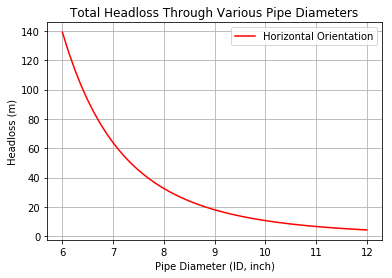

,6,8,10,12
Pipe ID (inch),6.065000,7.981000,10.020000,12.000000
Headloss (m),131.650497,32.984685,10.632715,4.383243


In [27]:
# Setup x and y values.
pipe_diameter_id_smooth = np.linspace(6, 12) * u.inch
headloss_various_diameters_smooth = pc.headloss(full_flow, pipe_diameter_id_smooth, pipe_length_trains,NU_WATER,PVC_ROUGHNESS,k_pipe)


#Graph headloss for different pipe diameters
plt.figure(0)
plt.plot(pipe_diameter_id_smooth, headloss_various_diameters_smooth, 'r-')
plt.xlabel('Pipe Diameter (ID, inch)')
plt.ylabel('Headloss (m)')
plt.title('Total Headloss Through Various Pipe Diameters')
plt.legend(['Horizontal Orientation', 'Vertical orientation'], loc='best')
plt.grid(True)
plt.show()

# Make a table with available pipe sizes
pipe_sdr = 26
pipe_diameters_nd = [6,8,10,12]#*u.inch
pipe_diameters_id = pipe.ID_sch40(pipe_diameters_nd)
headloss_various_diameters = pc.headloss(full_flow, pipe_diameters_id*u.inch, 
                                         pipe_length_trains,NU_WATER,PVC_ROUGHNESS,k_pipe)
pd.DataFrame(np.array([pipe_diameters_id,headloss_various_diameters.magnitude]),
             columns=pipe_diameters_nd, index=['Pipe ID (inch)','Headloss (m)'])

Using a 10 inch or 12 inch pipe would potentially leave enough remaining available headloss to use for flow control. 

## Flow Distribution
Now the question is about flow distribution. The effect of shutting off one train potentially effects the flow rate of the other. Determining the extent of this effect is a flow distribution problem, much like those done throughout plant design. By studying the various flow paths, one can determine the effect of shutting off a flow path during the worst case scenario. There are several steps to designing the optimal system. First, the goal is to reduce the headloss in the shared line, because that headloss changes when one branch is turned off and the flow rate is halved. As that headloss changes, the leftover headloss is taken up by the remaining line, increasing flow. The steps to define the optimal pipe configuration are as follows:

1. Make a guess for the ideal pipe geometry, attempting to minimize shared headloss and maximize train branch headloss.
2. Determine minor and major losses throughout the system.
3. Calculate the effect of cross-talk over a range of flow rates.

### Pipe Length Calculations

The initial pipe design is based on limited knowledge of the site, and is supposed to convey a conservative guess for the condction and distribution line geometry. When a full topography of the site and the two upstream pressure breaks, a more precise design will be made and analyzed. The video below is a rendering of the preliminary design of the conduction and train-distribution system:

[![Gracias Pipe System](https://i.ytimg.com/vi/rrisS073HYU/hqdefault.jpg?sqp=-oaymwEXCNACELwBSFryq4qpAwkIARUAAIhCGAE=&amp;rs=AOn4CLD_nd9y84VffIrXDJmTwNGN4aAsyw)](https://www.youtube.com/watch?v=rrisS073HYU "Gracias Pipe System")

### Headloss Calculation

The headloss in the various components of the system is critical in calculating the effect of cross-talk.

#### Headloss From the Pressure Break to the Tee

The first section of the conduction line is where the two smaller lines join the 10" conduction line. To calculate the headloss through the two pipes, an iterative approach is used. First, the flowrates for various headlosses through the 6" and 4" lines combined are calculated. Because the head of the 4" and 6" line is known to be the same at the Tee, it is assumed that the headloss is the same (pressure breaks have the same free surface.) When these two added flow rates together equal the full plant flow rate, the resulting headloss through both pipes represent the first losses in the distribution system: 


In [39]:
import aide_design.k_value_of_reductions_utility as k

diam_10 = pipe.ID_SDR(10, sdr_pipe)

# conservative minor loss coefficient in both lines pressure break to tee:
k_value_pressure_break_to_tee_6_inch = exp.K_MINOR_PIPE_ENTRANCE + \
    exp.K_MINOR_90 + k.k_value_expansion(diam_6, diam_10, full_flow)
k_value_pressure_break_to_tee_4_inch = exp.K_MINOR_PIPE_ENTRANCE + \
    exp.K_MINOR_90 + exp.K_MINOR_EL45 + k.k_value_expansion(diam_4, diam_10, full_flow)

print("k value in 6 inch line: " + str(k_value_pressure_break_to_tee_6_inch))
print('k value in 4 inch line: ' + str(k_value_pressure_break_to_tee_4_inch))

# conservative pipe lengths from pressure break to tee:
l_pressure_break_to_tee_6_inch = 4 * u.m
l_pressure_break_to_tee_4_inch = 4 * u.m

# determine headloss through both 4" and 6" pipes by defining headloss range:
headloss_range_pressure_break_to_tee = np.linspace(1,10,10) * u.m
# calculate the added flow rates for all the headlosses in the range:
flow_range_pressure_break_to_tee = pc.flow_pipe(diam_4, headloss_range_pressure_break_to_tee, 
                                                l_pressure_break_to_tee_4_inch, exp.NU_WATER, mat.PIPE_ROUGH_PVC,
                                               k_value_pressure_break_to_tee_4_inch) + \
    pc.flow_pipe(diam_4, headloss_range_pressure_break_to_tee, 
                                                l_pressure_break_to_tee_6_inch, exp.NU_WATER, mat.PIPE_ROUGH_PVC,
                                               k_value_pressure_break_to_tee_6_inch)
print(flow_range_pressure_break_to_tee.size)
print(headloss_range_pressure_break_to_tee.size)

pd.DataFrame(np.array([np.array(headloss_range_pressure_break_to_tee),np.array(flow_range_pressure_break_to_tee.to(u.L/u.s))]),
             columns=headloss_range_pressure_break_to_tee, index=['Headloss (m)', 'Flow Rate (L/s)'])


k value in 6 inch line: 1.28752624737
k value in 4 inch line: 2.03559191916
10
10


,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Headloss (m),1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000,10.000000
Flow Rate (L/s),45.144415,63.957844,78.392485,90.560499,101.280087,110.970869,119.882113,128.176222,135.966,143.333575


8 m of head is lost to the entrance in order to supply the full plant flow. This is a significant portion of the full flow, and is in the shared headloss section, meaning it will negatively impact the flow distribution cross-talk error.



## Gate Valve Calculation
The first is to determine the minimum gate valve that can be used assuming low headloss in the rest of the system. Flow through the gate valves can be modeled as a short (6") section of pipe with a k value of 0.17 according to https://neutrium.net/fluid_flow/pressure-loss-from-fittings-excess-head-k-method/.  :

In [ ]:
pipe_diameters_gate_valve_nd = [3,4,6,8]*u.inch
pipe_diameters_gate_valve_id = pipe.ID_sch40(pipe_diameters_gate_valve_nd)
branch_length = 4*u.m
gate_valve_k_value = 0.17
branch_k_value = exp.K_MINOR_EL90 * 3 + gate_valve_k_value
headloss_various_diameters_gate_valve = pc.headloss(flow, pipe_diameters_gate_valve_id*u.inch, branch_length,NU_WATER,PVC_ROUGHNESS,branch_k_value)

k_trunk = exp.K_MINOR_90*3+

pd.DataFrame(np.array([pipe_diameters_gate_valve_id,headloss_various_diameters_gate_valve.magnitude]),columns=pipe_diameters_gate_valve_nd, index=['Pipe ID (inch)','Headloss (m)'])
